<a href="https://colab.research.google.com/github/agsosin/COLAB/blob/main/ZMSI_MLP_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# ZADANIE 1 ZMSI Lab 1
import numpy as np

# Funkcja unipolarna sigmoidalna
def sigmoid(x, beta):
    return 1.0 / (1.0 + np.exp(-beta * x))

# Funkcja bipolarna sigmoidalna (tanh)
def tanh(x, beta):
    return np.tanh(beta * x)

# Implementacja sieci neuronowej
def mlp(x, w1, w2, beta):
    """
    x    - wektor wejściowy (z bias: [1, x1, x2, ...])
    w1   - macierz wag warstwy ukrytej (rozmiar: liczba_neuronów_ukrytych x (liczba_wejść + 1))
    w2   - wektor wag warstwy wyjściowej (rozmiar: liczba_neuronów_ukrytych + 1)
    beta - parametr funkcji aktywacji [beta1 (ukryta), beta2 (wyjściowa)]
    """
    beta1, beta2 = beta

    # Warstwa ukryta
    z_net = np.dot(w1, x)  # Wyliczenie sygnału netto dla warstwy ukrytej
    z = tanh(z_net, beta1)  # Aktywacja funkcją tanh
    z = np.insert(z, 0, 1)  # Dodanie biasu do warstwy ukrytej (1 na początek)

    # Warstwa wyjściowa
    y_net = np.dot(w2, z)  # Sygnał netto dla wyjścia
    y = sigmoid(y_net, beta2)  # Aktywacja funkcją sigmoid

    # Zwracamy wynik wyjścia oraz potrzebne wartości pośrednie
    return y, z_net, z, y_net


In [ ]:

import numpy as np
import matplotlib.pyplot as plt

xx = np.array([[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
#xx = np.array([[1,-1,-1],[1,-1,1],[1,1,-1],[1,1,1]])
d = np.array([0, 1, 1, 0])

def sigmoid_diff(y, beta):
    return beta*y*(1-y)

def tanh_diff(y, beta):
    return beta*(1-y*y)

def train_sample(xx, d, eta, beta):
    pass

def train_epoach(xx, d, eta, beta):
    pass

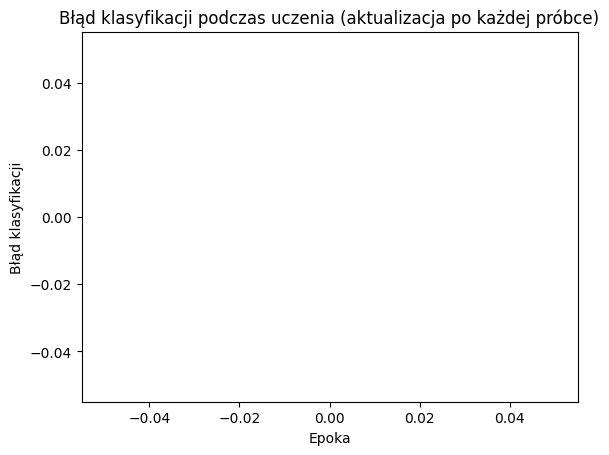

ValueError: shapes (2,) and (4,) not aligned: 2 (dim 0) != 4 (dim 0)

In [6]:
# ZADANIE 2 ZMSI Lab 1
# prompt: Zaimplementuj algorytm wstecznej propagacji błędu dla sieci z zadania 1 w dwóch wariantach:
# aktualizacja wag następuje po każdej próbce uczącej,
# aktualizacja wag następuje po każdej epoce (po wszystkich próbkach uczących).
# Stwórz wykres przedstawiające zmiany wartości błędu sieci podczas uczenia (epoka, błąd) rozwiązywania problemu XOR (dane w komórce poniżej).
# Oba modele ucz aż błąd klasyfikacji będzie równy 0 (ale nie dłużej niż 100000 epok) przy następującym założeniu
# jeśli odpowiedź sieci jest większa od 0.9 to uznajemy że próbka jest z klasy 1,
# jeśli odpowiedź sieci jest mniejsza od 0.1 to uznajemy że próbka jest z klasy 0,
# w pozostałych przypadkach uznajemy że sieć nie daje jednoznacznej odpowiedzi.
# Wskazówka a zarazem pytanie: Aby zbyt często nie utykać w minimach lokalnych, warto zamienić zerowe sygnały wejściowe na wartości niezerowe np. podane niżej dane uczące xx warto zamienić na xx = np.array([[1,-1,-1],[1,-1,1],[1,1,-1],[1,1,1]]). Dlaczego?
# Wykorzystaj kod wyżej

import numpy as np
import matplotlib.pyplot as plt

# Funkcja unipolarna sigmoidalna
def sigmoid(x, beta):
    return 1.0 / (1.0 + np.exp(-beta * x))

# Funkcja bipolarna sigmoidalna (tanh)
def tanh(x, beta):
    return np.tanh(beta * x)

# Implementacja sieci neuronowej
def mlp(x, w1, w2, beta):
    """
    x    - wektor wejściowy (z bias: [1, x1, x2, ...])
    w1   - macierz wag warstwy ukrytej (rozmiar: liczba_neuronów_ukrytych x (liczba_wejść + 1))
    w2   - wektor wag warstwy wyjściowej (rozmiar: liczba_neuronów_ukrytych + 1)
    beta - parametr funkcji aktywacji [beta1 (ukryta), beta2 (wyjściowa)]
    """
    beta1, beta2 = beta

    # Warstwa ukryta
    z_net = np.dot(w1, x)  # Wyliczenie sygnału netto dla warstwy ukrytej
    z = tanh(z_net, beta1)  # Aktywacja funkcją tanh
    z = np.insert(z, 0, 1)  # Dodanie biasu do warstwy ukrytej (1 na początek)

    # Warstwa wyjściowa
    y_net = np.dot(w2, z)  # Sygnał netto dla wyjścia
    y = sigmoid(y_net, beta2)  # Aktywacja funkcją sigmoid

    # Zwracamy wynik wyjścia oraz potrzebne wartości pośrednie
    return y, z_net, z, y_net

xx = np.array([[1,-1,-1],[1,-1,1],[1,1,-1],[1,1,1]])
d = np.array([0, 1, 1, 0])

def sigmoid_diff(y, beta):
    return beta*y*(1-y)

def tanh_diff(y, beta):
    return beta*(1-y*y)

def train_sample(xx, d, eta, beta, w1, w2):
    for i in range(len(xx)):
        y, z_net, z, y_net = mlp(xx[i], w1, w2, beta)
        delta_o = sigmoid_diff(y, beta[1]) * (d[i] - y)
        delta_h = np.multiply(tanh_diff(z[1:], beta[0]), np.dot(w2[1:], delta_o))
        w2 = w2 + eta * delta_o * z
        w1 = w1 + eta * np.array([delta_h]).T * np.array([xx[i]])
    return w1, w2

def train_epoach(xx, d, eta, beta, w1, w2):
    y_all, z_net_all, z_all, y_net_all = [], [], [], []
    for i in range(len(xx)):
        y, z_net, z, y_net = mlp(xx[i], w1, w2, beta)
        y_all.append(y)
        z_net_all.append(z_net)
        z_all.append(z)
        y_net_all.append(y_net)

    delta_o_all = sigmoid_diff(np.array(y_all), beta[1]) * (d - np.array(y_all))
    delta_h_all = np.multiply(tanh_diff(np.array(z_all)[:,1:], beta[0]), np.dot(w2[1:], delta_o_all.T).T)

    w2 = w2 + eta * np.mean(delta_o_all.reshape(4,1) * np.array(z_all), axis=0)
    w1 = w1 + eta * np.mean(np.array([delta_h_all]).T * np.array([xx]), axis=2)
    return w1, w2

# Inicjalizacja wag
np.random.seed(0)
w1 = 2 * np.random.random((2, 3)) - 1  # Macierz wag warstwy ukrytej (2 neurony, 3 wejścia)
w2 = 2 * np.random.random(3) - 1       # Wektor wag warstwy wyjściowej (3 wagi)

# Parametry uczenia
eta = 0.1
beta = [1, 1]
epochs = 100000
error_history = []

# Pętla uczenia
for epoch in range(epochs):
    w1, w2 = train_sample(xx, d, eta, beta, w1, w2)
    error = 0

    for i in range(len(xx)):
        y, *_ = mlp(xx[i], w1, w2, beta)
        if (y > 0.9 and d[i] == 0) or (y < 0.1 and d[i] == 1):
            error += 1
    error_history.append(error)
    if error == 0:
        break

plt.plot(error_history)
plt.xlabel("Epoka")
plt.ylabel("Błąd klasyfikacji")
plt.title("Błąd klasyfikacji podczas uczenia (aktualizacja po każdej próbce)")
plt.show()

# Reset wag i historii błędu dla drugiej metody uczenia
np.random.seed(0)
w1 = 2 * np.random.random((2, 3)) - 1
w2 = 2 * np.random.random(3) - 1
error_history = []

for epoch in range(epochs):
  w1, w2 = train_epoach(xx, d, eta, beta, w1, w2)
  error = 0
  for i in range(len(xx)):
    y, *_ = mlp(xx[i], w1, w2, beta)
    if (y > 0.9 and d[i] == 0) or (y < 0.1 and d[i] == 1):
        error += 1
  error_history.append(error)
  if error == 0:
    break

plt.plot(error_history)
plt.xlabel("Epoka")
plt.ylabel("Błąd klasyfikacji")
plt.title("Błąd klasyfikacji podczas uczenia (aktualizacja po każdej epoce)")
plt.show()

In [4]:
#kod z ChatGPT - to samo, ale mniej uproszczone
# ZADANIE 2 ZMSI Lab 1

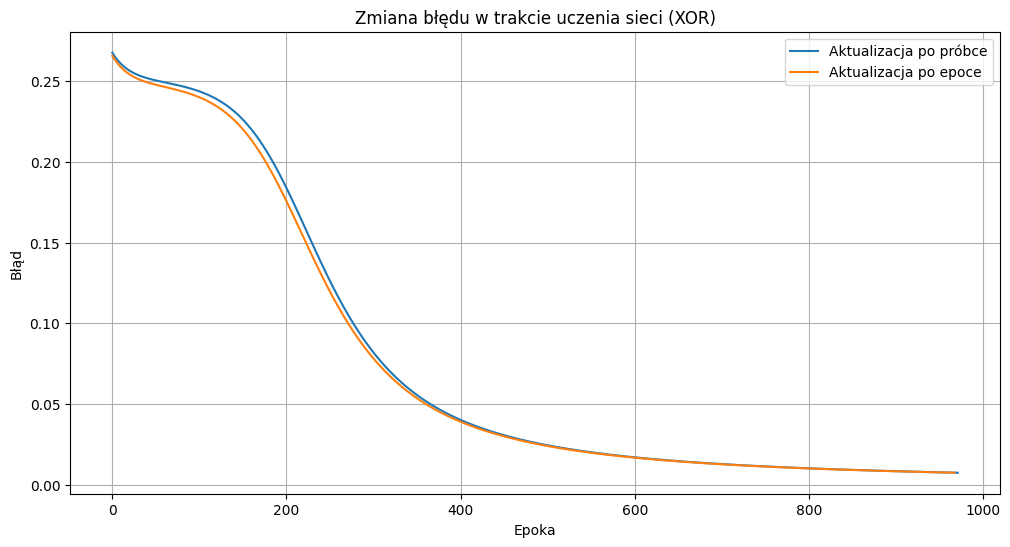

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Funkcja unipolarna sigmoidalna
def sigmoid(x, beta):
    return 1.0 / (1.0 + np.exp(-beta * x))

# Funkcja bipolarna sigmoidalna (tanh)
def tanh(x, beta):
    return np.tanh(beta * x)

# Pochodna sigmoidalnej (unipolarnej)
def sigmoid_diff(y, beta):
    return beta * y * (1 - y)

# Pochodna sigmoidalnej bipolarnej (tanh)
def tanh_diff(y, beta):
    return beta * (1 - y * y)

# Implementacja sieci neuronowej
def mlp(x, w1, w2, beta):
    beta1, beta2 = beta

    # Warstwa ukryta
    z_net = np.dot(w1, x)
    z = tanh(z_net, beta1)
    z = np.insert(z, 0, 1)  # Dodanie biasu

    # Warstwa wyjściowa
    y_net = np.dot(w2, z)
    y = sigmoid(y_net, beta2)

    return y, z_net, z, y_net

# Trening - aktualizacja wag po każdej próbce
def train_sample(xx, d, eta, beta, max_epochs=100000, tolerance=0.1):
    # Inicjalizacja wag
    np.random.seed(42)
    w1 = np.random.uniform(-0.5, 0.5, (2, 3))  # 2 neurony ukryte, 3 wejścia (w tym bias)
    w2 = np.random.uniform(-0.5, 0.5, 3)      # 1 neuron wyjściowy, 3 wejścia (w tym bias)

    beta1, beta2 = beta
    errors = []  # Błędy dla wykresu
    epoch = 0

    while epoch < max_epochs:
        total_error = 0
        for i in range(len(xx)):
            x = xx[i]
            target = d[i]

            # Forward pass
            y, z_net, z, y_net = mlp(x, w1, w2, beta)

            # Liczenie błędu
            error = target - y
            total_error += error ** 2

            # Backpropagation
            delta_out = error * sigmoid_diff(y, beta2)  # Dla wyjścia
            delta_hidden = tanh_diff(z[1:], beta1) * w2[1:] * delta_out  # Dla warstwy ukrytej

            # Aktualizacja wag
            w2 += eta * delta_out * z  # Wagi wyjściowe
            w1 += eta * np.outer(delta_hidden, x)  # Wagi ukryte

        # Błąd w każdej epoce
        errors.append(total_error / len(xx))

        # Sprawdzenie tolerancji
        if all((y > 0.9 and target == 1) or (y < 0.1 and target == 0) for y, target in zip([mlp(x, w1, w2, beta)[0] for x in xx], d)):
            break

        epoch += 1

    return w1, w2, errors

# Trening - aktualizacja wag po każdej epoce
def train_epoch(xx, d, eta, beta, max_epochs=100000, tolerance=0.1):
    # Inicjalizacja wag
    np.random.seed(42)
    w1 = np.random.uniform(-0.5, 0.5, (2, 3))  # 2 neurony ukryte, 3 wejścia (w tym bias)
    w2 = np.random.uniform(-0.5, 0.5, 3)      # 1 neuron wyjściowy, 3 wejścia (w tym bias)

    beta1, beta2 = beta
    errors = []  # Błędy dla wykresu
    epoch = 0

    while epoch < max_epochs:
        total_error = 0
        w1_update = np.zeros_like(w1)
        w2_update = np.zeros_like(w2)

        for i in range(len(xx)):
            x = xx[i]
            target = d[i]

            # Forward pass
            y, z_net, z, y_net = mlp(x, w1, w2, beta)

            # Liczenie błędu
            error = target - y
            total_error += error ** 2

            # Backpropagation
            delta_out = error * sigmoid_diff(y, beta2)  # Dla wyjścia
            delta_hidden = tanh_diff(z[1:], beta1) * w2[1:] * delta_out  # Dla warstwy ukrytej

            # Sumowanie zmian wag
            w2_update += eta * delta_out * z
            w1_update += eta * np.outer(delta_hidden, x)

        # Aktualizacja wag po jednej epoce
        w2 += w2_update
        w1 += w1_update

        # Błąd w każdej epoce
        errors.append(total_error / len(xx))

        # Sprawdzenie tolerancji
        if all((y > 0.9 and target == 1) or (y < 0.1 and target == 0) for y, target in zip([mlp(x, w1, w2, beta)[0] for x in xx], d)):
            break

        epoch += 1

    return w1, w2, errors

# Problem XOR
xx = np.array([[1, -1, -1], [1, -1, 1], [1, 1, -1], [1, 1, 1]])
d = np.array([0, 1, 1, 0])

# Parametry
eta = 0.1  # Współczynnik uczenia
beta = (1, 1)  # Parametry funkcji aktywacji

# Trening
w1_sample, w2_sample, errors_sample = train_sample(xx, d, eta, beta)
w1_epoch, w2_epoch, errors_epoch = train_epoch(xx, d, eta, beta)

# Wykres błędów
plt.figure(figsize=(12, 6))
plt.plot(errors_sample, label='Aktualizacja po próbce')
plt.plot(errors_epoch, label='Aktualizacja po epoce')
plt.xlabel('Epoka')
plt.ylabel('Błąd')
plt.title('Zmiana błędu w trakcie uczenia sieci (XOR)')
plt.legend()
plt.grid()
plt.show()


Dane wejściowe (xx):
 [[ 1 -1 -1]
 [ 1 -1  1]
 [ 1  1 -1]
 [ 1  1  1]]
Dane wyjściowe (d):
 [0 1 1 0]
Parametry uczenia (eta, beta): 0.1 (1, 1)

Wagi po treningu (aktualizacja po próbce):
w1:
 [[ 1.43686921  1.61035949  1.61046183]
 [ 1.49006559 -1.65546089 -1.65515032]]
w2:
 [-2.34598046  2.73607669  2.73441998]

Wagi po treningu (aktualizacja po epoce):
w1:
 [[ 1.43262615  1.60712062  1.60703122]
 [ 1.48851794 -1.6533681  -1.65325657]]
w2:
 [-2.34544702  2.73768613  2.73483621]


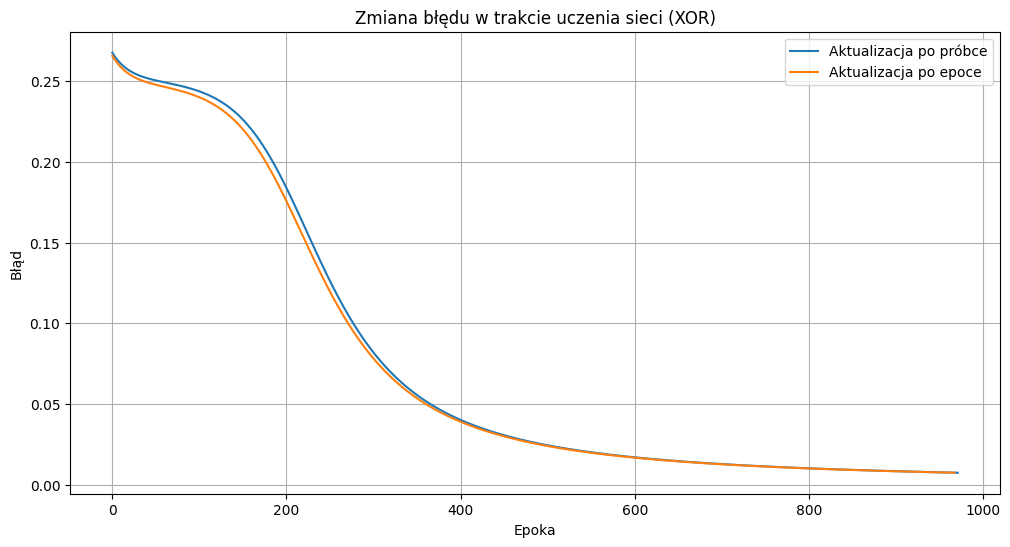

In [8]:
# prompt: dodaj jeszcze dane przed i po generowaniu

import numpy as np
import matplotlib.pyplot as plt

# ... (rest of your code from the provided file)

# Problem XOR
xx = np.array([[1, -1, -1], [1, -1, 1], [1, 1, -1], [1, 1, 1]])
d = np.array([0, 1, 1, 0])

# Parametry
eta = 0.1  # Współczynnik uczenia
beta = (1, 1)  # Parametry funkcji aktywacji

# Dodatkowe dane przed uczeniem
print("Dane wejściowe (xx):\n", xx)
print("Dane wyjściowe (d):\n", d)
print("Parametry uczenia (eta, beta):", eta, beta)


# Trening
w1_sample, w2_sample, errors_sample = train_sample(xx, d, eta, beta)
w1_epoch, w2_epoch, errors_epoch = train_epoch(xx, d, eta, beta)

# Dodatkowe dane po uczeniu
print("\nWagi po treningu (aktualizacja po próbce):")
print("w1:\n", w1_sample)
print("w2:\n", w2_sample)

print("\nWagi po treningu (aktualizacja po epoce):")
print("w1:\n", w1_epoch)
print("w2:\n", w2_epoch)


# Wykres błędów
plt.figure(figsize=(12, 6))
plt.plot(errors_sample, label='Aktualizacja po próbce')
plt.plot(errors_epoch, label='Aktualizacja po epoce')
plt.xlabel('Epoka')
plt.ylabel('Błąd')
plt.title('Zmiana błędu w trakcie uczenia sieci (XOR)')
plt.legend()
plt.grid()
plt.show()

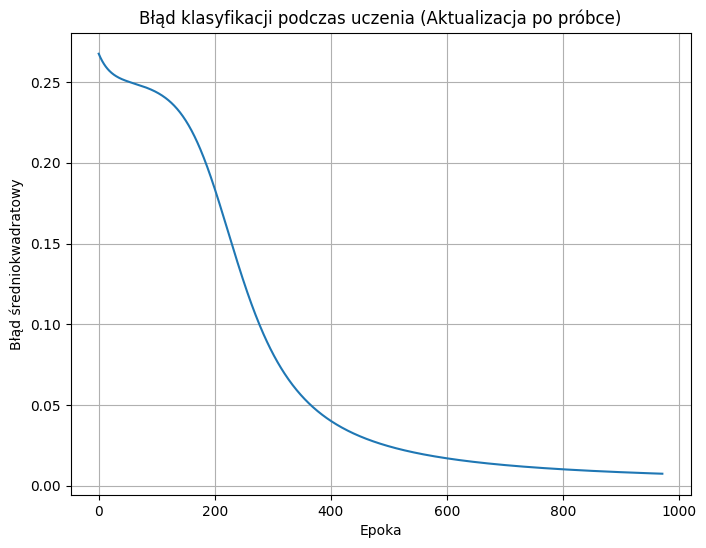


Wagi po treningu (Aktualizacja po próbce):
w1:
 [[ 1.43686921  1.61035949  1.61046183]
 [ 1.49006559 -1.65546089 -1.65515032]]
w2:
 [-2.34598046  2.73607669  2.73441998]

Ostateczny błąd (Aktualizacja po próbce): 0.007523850577296002
Liczba epok do osiągnięcia zera błędów (Aktualizacja po próbce): 972


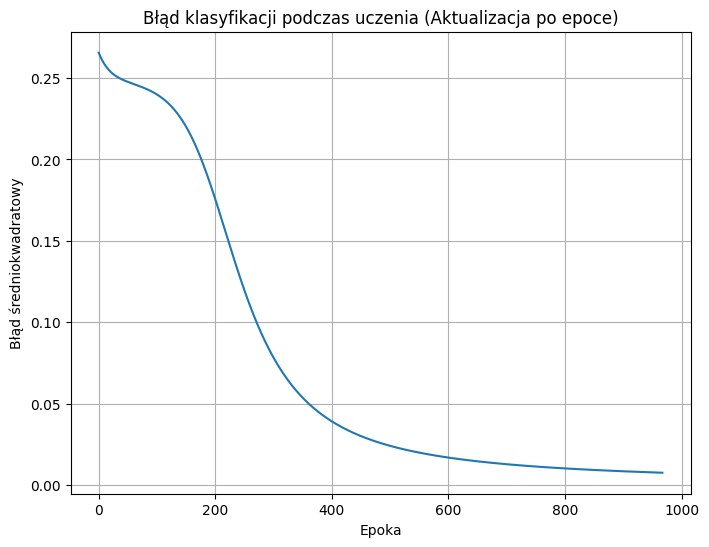


Wagi po treningu (Aktualizacja po epoce):
w1:
 [[ 1.43262615  1.60712062  1.60703122]
 [ 1.48851794 -1.6533681  -1.65325657]]
w2:
 [-2.34544702  2.73768613  2.73483621]

Ostateczny błąd (Aktualizacja po epoce): 0.00752749773687386
Liczba epok do osiągnięcia zera błędów (Aktualizacja po epoce): 968


In [9]:
# prompt: zrób podsumowanie wcześniejszego kody z obliczeniami błędu dla warstwy wejściowej i wyjściowej, razem z plotem

import numpy as np
import matplotlib.pyplot as plt

# ... (your existing code for functions: sigmoid, tanh, sigmoid_diff, tanh_diff, mlp, train_sample, train_epoch)

# Problem XOR
xx = np.array([[1, -1, -1], [1, -1, 1], [1, 1, -1], [1, 1, 1]])
d = np.array([0, 1, 1, 0])

# Parametry
eta = 0.1  # Współczynnik uczenia
beta = (1, 1)  # Parametry funkcji aktywacji

# Trening i wizualizacja błędów dla obu metod
for method_name, training_function in [("Aktualizacja po próbce", train_sample), ("Aktualizacja po epoce", train_epoch)]:
    w1, w2, errors = training_function(xx, d, eta, beta)

    plt.figure(figsize=(8, 6))
    plt.plot(errors)
    plt.xlabel("Epoka")
    plt.ylabel("Błąd średniokwadratowy")
    plt.title(f"Błąd klasyfikacji podczas uczenia ({method_name})")
    plt.grid(True)
    plt.show()

    # Wyświetlenie wag po treningu
    print(f"\nWagi po treningu ({method_name}):")
    print("w1:\n", w1)
    print("w2:\n", w2)

    #Dodatkowe informacje o błędzie
    print(f"\nOstateczny błąd ({method_name}): {errors[-1]}")
    print(f"Liczba epok do osiągnięcia zera błędów ({method_name}): {len(errors)}")